In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Import libraries
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

#Load haar cascade xml
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Emotions/haarcascade_frontalface_default.xml')

#Category of emotions
CATEGORIES = ["anger","disgust","fear","joy","sadness", "surprise"]

#Function to prepare data for predictions
def prepare(filepath):
  
    #Define image size
    IMGSIZE = 120
    
    #Read image
    img_arraycolor = cv2.imread(filepath, cv2.IMREAD_COLOR)
    
    #Read image
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    
    #Use haar cascade to detect face in image          
    faces = face_cascade.detectMultiScale(img_array, 1.3, 5)

    #Extract face from image
    for (x,y,w,h) in faces:
      roi_gray = img_array[y:y+h, x:x+w]
    
    #Resize extracted face image
    new_array = cv2.resize(roi_gray, (IMGSIZE,IMGSIZE))
    
    #Show original image
    print("Original Image")
    plt.imshow(cv2.cvtColor(img_arraycolor, cv2.COLOR_BGR2RGB))
    plt.show()
    
    #Show new image
    print("Normalised Image")
    plt.imshow(new_array, cmap="gray")
    plt.show()
    
    return new_array.reshape(-1, IMGSIZE, IMGSIZE, 1)

#Function to print predictions for each category  
def percentages(vector):
  
  #For Loop
  for x in range(6):
    
    #get percentage vector
    percentage = vector[0][x]
    
    #Print the different percentage values for the predictions
    if(x == 0):
      print("Anger Percentage = " + "{0:.1f}%".format(percentage*100))
    if(x == 1):
      print("Disgust Percentage = " + "{0:.1f}%".format(percentage*100))
    if(x == 2):
      print("Fear Percentage = " + "{0:.1f}%".format(percentage*100))
    if(x == 3):
      print("Joy Percentage = " + "{0:.1f}%".format(percentage*100))
    if(x == 4):
      print("Sadness Percentage = " + "{0:.1f}%".format(percentage*100))
    if(x == 5):
      print("Surprise Percentage = " + "{0:.1f}%\n".format(percentage*100))

Using TensorFlow backend.


Original Image


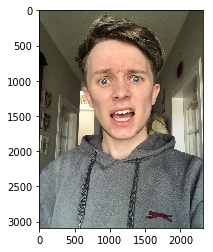

Normalised Image


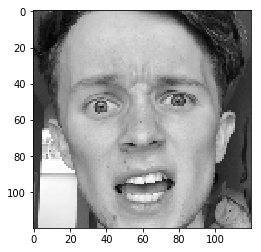

anger = surprise
Anger Percentage = 0.0%
Disgust Percentage = 0.0%
Fear Percentage = 0.0%
Joy Percentage = 0.0%
Sadness Percentage = 0.0%
Surprise Percentage = 100.0%

Original Image


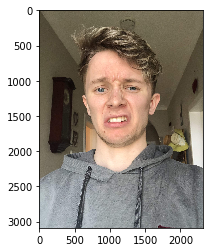

Normalised Image


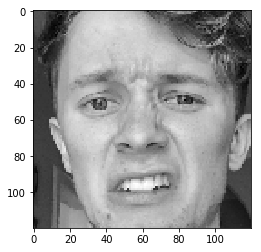

disgust = disgust
Anger Percentage = 0.0%
Disgust Percentage = 100.0%
Fear Percentage = 0.0%
Joy Percentage = 0.0%
Sadness Percentage = 0.0%
Surprise Percentage = 0.0%

Original Image


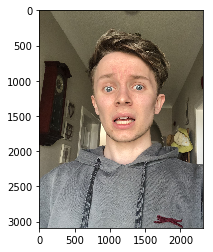

Normalised Image


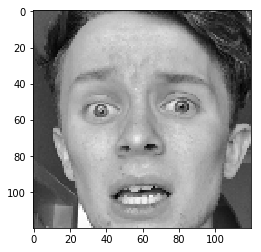

fear = surprise
Anger Percentage = 0.0%
Disgust Percentage = 0.0%
Fear Percentage = 0.0%
Joy Percentage = 0.0%
Sadness Percentage = 0.0%
Surprise Percentage = 100.0%

Original Image


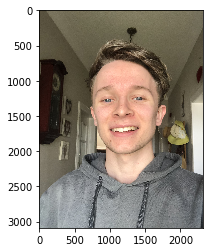

Normalised Image


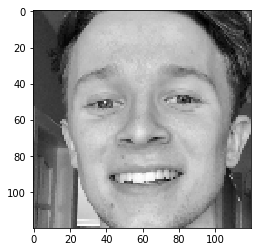

joy = joy
Anger Percentage = 0.0%
Disgust Percentage = 0.0%
Fear Percentage = 0.0%
Joy Percentage = 100.0%
Sadness Percentage = 0.0%
Surprise Percentage = 0.0%

Original Image


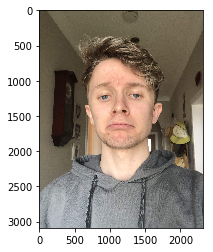

Normalised Image


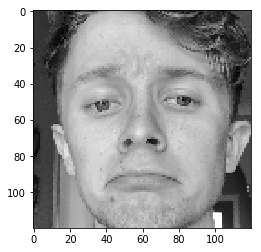

sadness = sadness
Anger Percentage = 0.0%
Disgust Percentage = 0.0%
Fear Percentage = 0.0%
Joy Percentage = 0.0%
Sadness Percentage = 100.0%
Surprise Percentage = 0.0%

Original Image


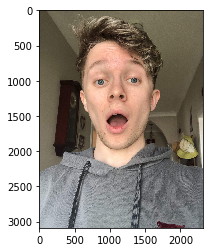

Normalised Image


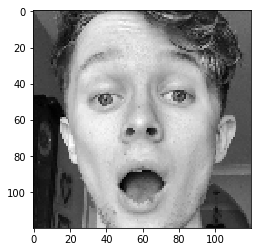

surprise = surprise
Anger Percentage = 0.0%
Disgust Percentage = 0.0%
Fear Percentage = 0.0%
Joy Percentage = 0.0%
Sadness Percentage = 0.0%
Surprise Percentage = 100.0%



In [4]:
#Load model
model = tf.keras.models.load_model("/content/drive/My Drive/Emotions/Models/4-conv-128-nodes-0-dense.model")

#Get model prediction of image
prediction = model.predict([prepare('/content/drive/My Drive/Emotions/Test Images/anger.jpg')])
#print largest percentage category
print("anger = " + CATEGORIES[np.argmax(prediction[0])])
#print images
percentages(prediction)

#Get model prediction of image
prediction = model.predict([prepare('/content/drive/My Drive/Emotions/Test Images/disgust.jpg')])
#print largest percentage category
print("disgust = " + CATEGORIES[np.argmax(prediction[0])])
#print images
percentages(prediction)

#Get model prediction of image
prediction = model.predict([prepare('/content/drive/My Drive/Emotions/Test Images/fear.jpg')])
#print largest percentage category
print("fear = " + CATEGORIES[np.argmax(prediction[0])])
#print images
percentages(prediction)

#Get model prediction of image
prediction = model.predict([prepare('/content/drive/My Drive/Emotions/Test Images/joy.jpg')])
#print largest percentage category
print("joy = " + CATEGORIES[np.argmax(prediction[0])])
#print images
percentages(prediction)

#Get model prediction of image
prediction = model.predict([prepare('/content/drive/My Drive/Emotions/Test Images/sadness.jpg')])
#print largest percentage category
print("sadness = " + CATEGORIES[np.argmax(prediction[0])])
#print images
percentages(prediction)

#Get model prediction of image
prediction = model.predict([prepare('/content/drive/My Drive/Emotions/Test Images/surprise.jpg')])
#print largest percentage category
print("surprise = " + CATEGORIES[np.argmax(prediction[0])])
#print images
percentages(prediction)
